# Basemap

Basemap is a part of Matplotlib which enables the easy creation of robus maps and beautiful maps.

In [1]:
!sudo pip install geopy

Cleaning up...


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
import numpy as np
import pandas as pd # odd dependency, must import before basemap!
from mpl_toolkits.basemap import Basemap

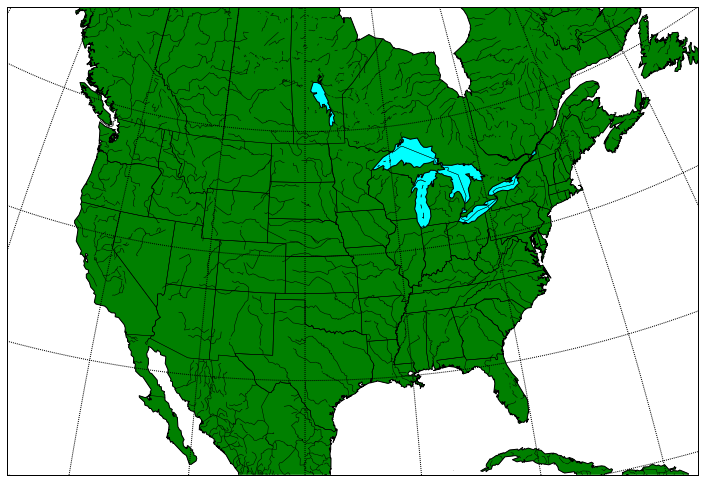

In [3]:
# A SIMPLE GRAPH INCLUDING ALL THE RIVERS IN THE CONTINENTAL UNITED STATES

fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
lat_0=35
map = Basemap(projection='stere',lon_0=-100,lat_0=35.,lat_ts=lat_0,\
            llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-50,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
map.drawcoastlines()
map.drawcountries()
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.drawstates()
map.drawrivers()
map.fillcontinents(color='green',lake_color='aqua')
map.drawmeridians(np.arange(0,360,10))
map.drawparallels(np.arange(-90,90,10))
map.drawmapboundary()
plt.show()

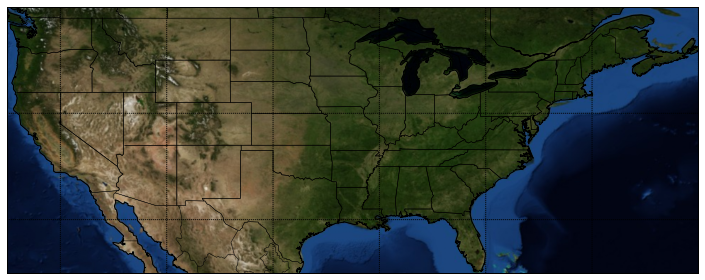

In [4]:
# A FLAT MAP WITH AN IMAGE BACKGROUND

fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
map = Basemap(\
            llcrnrlat=25,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-60,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
map.drawcoastlines()
map.drawcountries()
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.drawstates()
map.bluemarble() # NASA's famous blue marble image
map.drawmeridians(np.arange(0,360,10))
map.drawparallels(np.arange(-90,90,10))
map.drawmapboundary()
plt.show()

In [5]:
# LOAD ALL THE STARBUCKS LOCATIONS FROM EARLIER

fname = 'All_Starbucks_Locations_in_the_World.csv'
df = pd.read_csv(fname)
cfilter = df['Country'] == 'US'
sfilter = df['Country Subdivision'] == 'CA'
lafilter = df['City'] == 'Los Angeles'
df['color'] = 'blue'
df.ix[lafilter, 'color'] = 'green'
filter = cfilter & sfilter
ca = df[filter]

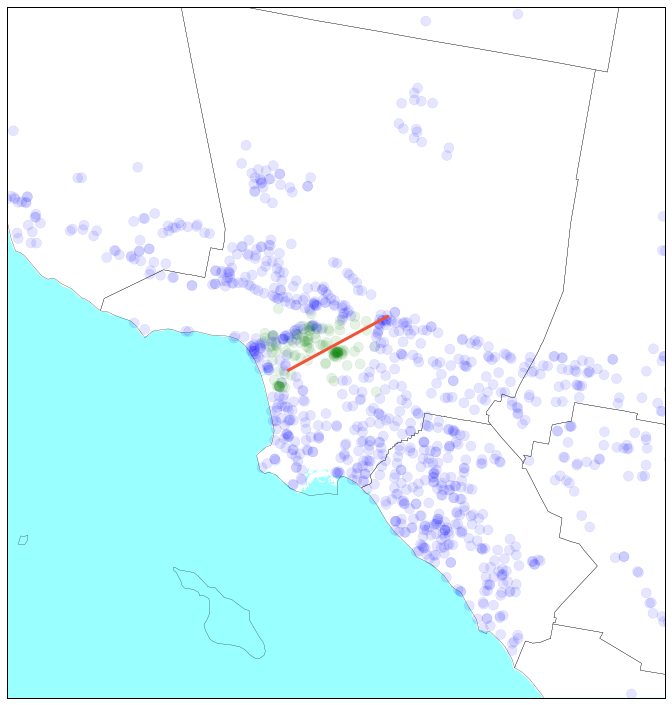

In [6]:
# PLOT STARBUCKS LOCATIONS IN LOS ANGELES COUNTY

fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
map = Basemap(projection='stere',lon_0=-100,lat_0=35.,\
            llcrnrlat=33.1,urcrnrlat=35,\
            llcrnrlon=-119.0,urcrnrlon=-117.5,\
            rsphere=6371200.,resolution='h',area_thresh=10000)
map.drawcountries()
map.drawcounties(linewidth=0.25)
map.drawmapboundary(fill_color='#99ffff')
map.fillcontinents(color='#ffffff',lake_color='darkblue', zorder=0)
map.drawrivers()

lons = ca['Longitude'].tolist()
lats = ca['Latitude'].tolist()

x, y = map(lons, lats)
map.scatter(x,y,100,marker='o',color=ca.color, alpha=0.1)

# DataScience Office
lon1 = -118.383014
lat1 = 33.988385

# Pasadena
lon2 = -118.131944
lat2 = 34.156111

map.drawgreatcircle(lon1, lat1, lon2, lat2, lw=3)

plt.show()

# Uses for Basemap in Data Science
* Visualization